<a href="https://colab.research.google.com/github/ALRIER/Class2023/blob/March2023_II/Regex%26TextAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paquetería

In [1]:
!pip install pdftools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install rpy2==3.5.1
!pip install pdfminer.six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# activate R magic
%load_ext rpy2.ipython
     

In [4]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

# Instalar paquetes en R
packages = ["syuzhet", "stringr", "dplyr", "rtweet", "twitteR", "tibble", "pdftools","gsub", "quanteda", "tm", "stopwords", "RColorBrewer", "ggplot2", "wordcloud"]
utils = importr("utils")
utils.chooseCRANmirror(ind=1)
utils.install_packages(robjects.StrVector(packages))



(as ‘lib’ is unspecified)



































































	‘/tmp/RtmpygEnq8/downloaded_packages’



<rpy2.rinterface_lib.sexp.NULLType object at 0x7f66835e08c0> [RTYPES.NILSXP]

In [5]:
%%R
require("tibble")
require("dplyr")
require("stringr")
require("syuzhet")
require("rtweet")
require("twitteR")
require("pdftools")
require("gsub")
require("quanteda")
require("tm")
require("stopwords")
require("RColorBrewer")
require("ggplot2")
require("wordcloud")



Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union





Attaching package: ‘rtweet’



    get_tokens



Attaching package: ‘twitteR’



    lookup_statuses



    id, location





Unicode version: 13.0
ICU version: 66.1





Attaching package: ‘NLP’



    meta, meta<-


Attaching package: ‘tm’



    stopwords



Attaching package: ‘stopwords’



    stopwords




Attaching package: ‘ggplot2’



    annotate





Este código me va a dar el largo de un conjunto de elementos. 

In [6]:
%%R

x = c("why", "video", "cross", "extra", "deal", "authority")
str_length(x)

[1] 3 5 5 5 4 9


In [7]:
x = ["why:P", "video", "cross", "extra", "deal", "authority"]
lengths = [len(i) for i in x]
print(lengths)

[5, 5, 5, 5, 4, 9]


In [8]:
%%R

concatenated = str_c(x, collapse= ", ")
concatenated 

[1] "why, video, cross, extra, deal, authority"


In [9]:
x = ["why", "video", "cross", "extra", "deal", "authority"]
concatenated = ", ".join(x)
print(concatenated)

why, video, cross, extra, deal, authority


Ahora vamos a extraer una cadena de texto, en este caso vamos a crear un string para poder realizar la búsqueda y después vamos a identificar los patrones. 

In [10]:
%%R

word = "The best programing course ever!"
str_sub(string = word, start = 2, end = 20)

[1] "he best programing "


In [11]:
word = "The best programing course ever!"
substring = word[1:19]
print(substring)

he best programing


In [12]:
%%R

word = "En esto, le vino al pensamiento cómo le haría, y fue que rasgó una gran tira de las faldas de la camisa, que andaban colgando, y diole once ñudos, el uno más gordo que los demás, y esto le sirvió de rosario el tiempo que allí estuvo, donde rezó un millón de avemarí Y lo que le fatigaba mucho era no hallar por allí otro ermitaño que le confesase y con quien consolarse; y, se entretenía paseándose por el pradecillo, escribiendo y grabando por las cortezas de los árboles y por la menuda arena muchos versos, todos acomodados a su tristeza, y algunos en alabanza de Dulcinea."
str_extract_all(string = word, pattern = "[aeiou]") #Dentro de las commillas vá cualquier regex qe ustedes deseen buscar.

[[1]]
  [1] "e" "o" "e" "i" "o" "a" "e" "a" "i" "e" "o" "o" "e" "a" "a" "u" "e" "u"
 [19] "e" "a" "u" "a" "a" "i" "a" "e" "a" "a" "a" "e" "a" "a" "i" "a" "u" "e"
 [37] "a" "a" "a" "o" "a" "o" "i" "o" "e" "o" "e" "u" "o" "e" "u" "o" "o" "o"
 [55] "u" "e" "o" "e" "e" "o" "e" "i" "i" "e" "o" "a" "i" "o" "e" "i" "e" "o"
 [73] "u" "e" "a" "e" "u" "o" "o" "e" "e" "u" "i" "e" "a" "e" "a" "o" "u" "e"
 [91] "e" "a" "i" "a" "a" "u" "o" "e" "a" "o" "a" "a" "o" "a" "o" "o" "e" "i"
[109] "a" "o" "u" "e" "e" "o" "e" "a" "e" "o" "u" "i" "e" "o" "o" "a" "e" "e"
[127] "e" "e" "e" "a" "a" "e" "o" "e" "o" "e" "a" "e" "i" "o" "e" "i" "i" "e"
[145] "o" "a" "a" "o" "o" "a" "o" "e" "a" "e" "o" "o" "e" "o" "a" "e" "u" "a"
[163] "a" "e" "a" "u" "o" "e" "o" "o" "o" "a" "o" "o" "a" "o" "a" "u" "i" "e"
[181] "a" "a" "u" "o" "e" "a" "a" "a" "a" "e" "u" "i" "e" "a"



In [13]:
import re #rees el paquete de python que más se usa para analitica de textos, hay que tenerlo en cuenta. 

x = "The best programming course ever!"
a = re.findall("[aeiou]", x)
print(a)

['e', 'e', 'o', 'a', 'i', 'o', 'u', 'e', 'e', 'e']


Extraigo un conjunto de datos de una lista de elementos, vector o conjunto de datos. 

In [14]:
%%R

x = c("why", "video", "cross", "extra", "deal", "authority")
str_subset( string = x, pattern = "[aeiou]")

[1] "video"     "cross"     "extra"     "deal"      "authority"


In [15]:
x = ["why", "video", "cross", "extra", "deal", "authority"]
output = [palabra for palabra in x if re.search("[aeiou]", palabra)]

print(output)

['video', 'cross', 'extra', 'deal', 'authority']


Contando la ubicación de un caracter que he decidido dentro de un conjunto de elementos, en este caso una lista o vector de elementos. 

In [16]:
%%R
x = c("why", "video", "cross", "extra", "deal", "authority")
str_count( string = x, pattern = "[aeiou]")

[1] 0 3 1 2 2 4


In [17]:
x = ["why", "video", "cross", "extra", "deal", "authority"]
output = [len(re.findall("[aeiou]", s)) for s in x]
print(output)


[0, 3, 1, 2, 2, 4]


Ahora vamos a trabajar con valores de verdad

In [18]:
%%R
x = c("why", "video", "cross", "extra", "deal", "authority")
str_detect( string = x, pattern = "[aeiou]")

[1] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE


In [19]:
x = ["why", "video", "cross", "extra", "deal", "authority"]
output = [bool(re.search("[aeiou]", s)) for s in x]
print(output)

[False, True, True, True, True, True]


Ahora vamos por un ejercicio un poco más real. 

In [20]:
%%R

data = mtcars
#Lo que hacemos aquí es simplemente cambiar el nombre de los vehículos a una columna independiente
data = data %>% rownames_to_column(var = "Model")
print(data%>% head())

              Model  mpg cyl disp  hp drat    wt  qsec vs am gear carb
1         Mazda RX4 21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
2     Mazda RX4 Wag 21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
3        Datsun 710 22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
4    Hornet 4 Drive 21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
5 Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
6           Valiant 18.1   6  225 105 2.76 3.460 20.22  1  0    3    1


In [21]:
import pandas as pd
from statsmodels.datasets import get_rdataset
import seaborn as sns
data = sns.load_dataset('mpg')
data = data.reset_index().rename(columns={"name": "Model"})
print(data.head())

   index   mpg  cylinders  displacement  horsepower  weight  acceleration  \
0      0  18.0          8         307.0       130.0    3504          12.0   
1      1  15.0          8         350.0       165.0    3693          11.5   
2      2  18.0          8         318.0       150.0    3436          11.0   
3      3  16.0          8         304.0       150.0    3433          12.0   
4      4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                      Model  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [22]:
%%R
filtered_data <- data %>% filter(str_detect(string= Model, pattern = "(erc)"))
head(filtered_data)

       Model  mpg cyl  disp  hp drat   wt qsec vs am gear carb
1  Merc 240D 24.4   4 146.7  62 3.69 3.19 20.0  1  0    4    2
2   Merc 230 22.8   4 140.8  95 3.92 3.15 22.9  1  0    4    2
3   Merc 280 19.2   6 167.6 123 3.92 3.44 18.3  1  0    4    4
4  Merc 280C 17.8   6 167.6 123 3.92 3.44 18.9  1  0    4    4
5 Merc 450SE 16.4   8 275.8 180 3.07 4.07 17.4  0  0    3    3
6 Merc 450SL 17.3   8 275.8 180 3.07 3.73 17.6  0  0    3    3


In [23]:
filtered_data = data[data["Model"].str.contains("erc", flags=re.IGNORECASE)]
print(filtered_data.head())

     index   mpg  cylinders  displacement  horsepower  weight  acceleration  \
49      49  23.0          4         122.0        86.0    2220          14.0   
67      67  11.0          8         429.0       208.0    4633          11.0   
90      90  12.0          8         429.0       198.0    4952          11.5   
113    113  21.0          6         155.0       107.0    2472          14.0   
154    154  15.0          6         250.0        72.0    3432          21.0   

     model_year origin                     Model  
49           71    usa        mercury capri 2000  
67           72    usa           mercury marquis  
90           73    usa  mercury marquis brougham  
113          73    usa          mercury capri v6  
154          75    usa           mercury monarch  


In [24]:
%%R
x = c("why", "video", "cross", "extra", "deal", "authority")
str_replace( string = x, pattern = "[aeiou]", replacement = "  ")

[1] "why"        "v  deo"     "cr  ss"     "  xtra"     "d  al"     
[6] "  uthority"


In [25]:
x = ["why", "video", "cross", "extra", "deal", "authority"]
result = [re.sub("[aeiou]", "remplase por este texto", palabra) for palabra in x]
print(result)

['why', 'vremplase por este textodremplase por este textoremplase por este texto', 'crremplase por este textoss', 'remplase por este textoxtrremplase por este texto', 'dremplase por este textoremplase por este textol', 'remplase por este textoremplase por este textothremplase por este textorremplase por este textoty']


In [26]:
%%R
a = c("a,b", "c,d,e", "Hola", "Hola a todos")
str_split( string = a, pattern = ",")

[[1]]
[1] "a" "b"

[[2]]
[1] "c" "d" "e"

[[3]]
[1] "Hola"

[[4]]
[1] "Hola a todos"



In [27]:
a = ["a,b", "c,d,e", "Hola", "Hola a todos"]
split_a = [re.split(",", x) for x in a]
print(split_a)

[['a', 'b'], ['c', 'd', 'e'], ['Hola'], ['Hola a todos']]


#Importación libro

In [28]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
from pdfminer.high_level import extract_text

with open('/content/drive/MyDrive/Databases/Entendiendo-correctamente-el-libertarismo.pdf', 'rb') as pdf_file:
    libro = extract_text(pdf_file)

print(libro[1:100])


ntendiendo 
correctamente el 
libertarismo 
Hans-Hermann Hoppe 

CENTRO MISES

 
 
Entendiendo 
c


#Ahora trabajemos sobre python. 

In [39]:
# Importar biblioteca tweepy
import tweepy

# Configurar credenciales de Twitter API
consumer_key = "6gMch1lkCfn3W5PZho3X4jh8W"
consumer_secret = "eBosfeWmQVBLQ87WiVMaRXousYRdyOkyhLkvCUzw7ioz0EMCWY"
access_token = "284827529-UENNMA2jVHCRBYwcddd6obAAZvaJ0hUVSapYYmwZ"
access_secret = "sb1fgjDG9CSugsU5qsWJWkBOvP91FxJmcm7hKCyajrndT"

# Autenticar con la API de Twitter
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret,
    access_token, access_secret
)

# Crear objeto API de tweepy
api = tweepy.API(auth)

# Realizar una solicitud a la API de Twitter
public_tweets = api.user_timeline(screen_name="elonmusk", count=100)

# Iterar sobre los tweets y obtener el texto
tweet_text = [tweet.text for tweet in public_tweets]
tweet_text


['@ehikian Voice &amp; video chat coming soon',
 '@Scobleizer @alirocketeer Cool!\n\nImproved video features should land almost every week.',
 '@EvaFoxU High time this happened',
 '@krassenstein It should not be socially acceptable to call someone an [anything] supremacist, unless there is unequ… https://t.co/tanekoWv6f',
 '@imjdsharp @krassenstein Exactly',
 'RT @Starlink: Over one-third of secondary schools and two-thirds of primary schools around the world are not connected to the internet.\n\nOn…',
 '@WholeMarsBlog There are some jobs that can be done effectively at home, but it is super out of touch to suggest th… https://t.co/rOABkR8pIx',
 '@krassenstein @SquawkCNBC @JGreenblattADL I mostly agree with that statement, but talk is cheap – results are what… https://t.co/WZgdDnSwy4',
 '@SquawkCNBC @JGreenblattADL *Jonathan',
 '@WholeMarsBlog There’s probably some really embarrassing stuff in the book 🤣',
 '@mysteriouskat True (sigh)',
 '@aaronsibarium This is dumb',
 '@SquawkCNBC @JG

A partir del avance que has compartido, lo siguiente sería guardar la información de los tweets en un DataFrame utilizando la librería pandas.

Para ello vamos a crear un diccionario con las columnas que deseas incluir en el DataFrame y la información de los tweets:

In [40]:
tweet_dict = {
    "ID": [tweet.id for tweet in public_tweets],
    "Fecha": [tweet.created_at for tweet in public_tweets],
    "Texto": [tweet.text for tweet in public_tweets],
    "Usuario": [tweet.user.screen_name for tweet in public_tweets],
    "Seguidores": [tweet.user.followers_count for tweet in public_tweets],
    "Likes": [tweet.favorite_count for tweet in public_tweets],
    "Retweets": [tweet.retweet_count for tweet in public_tweets],
    "Favorited": [tweet.favorited for tweet in public_tweets],
    "Retweeted": [tweet.retweeted for tweet in public_tweets]
}

In [41]:
tweet_df = pd.DataFrame(tweet_dict)
print(tweet_df.head())

                    ID                     Fecha  \
0  1659332812980338688 2023-05-18 22:59:06+00:00   
1  1659315068037738498 2023-05-18 21:48:35+00:00   
2  1659314565543256066 2023-05-18 21:46:35+00:00   
3  1659310997872558082 2023-05-18 21:32:25+00:00   
4  1659309549440888832 2023-05-18 21:26:39+00:00   

                                               Texto   Usuario  Seguidores  \
0        @ehikian Voice &amp; video chat coming soon  elonmusk   140031936   
1  @Scobleizer @alirocketeer Cool!\n\nImproved vi...  elonmusk   140031936   
2                   @EvaFoxU High time this happened  elonmusk   140031936   
3  @krassenstein It should not be socially accept...  elonmusk   140031936   
4                   @imjdsharp @krassenstein Exactly  elonmusk   140031936   

   Likes  Retweets  Favorited  Retweeted  
0    685       103      False      False  
1    736        56      False      False  
2   1192        84      False      False  
3  19398      2145      False      False  
4  

Esta línea de código quita signos de puntuación, números, symbolos, quita URLs, separadores, entre otros pero además, deja el documento separado en tokens.

#Analizando documentos de texto en python. 

In [42]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re

# Remove mentions, urls, emojis, numbers, punctuation, etc.
text = re.sub(r"@\w+", "", libro)
text = re.sub(r"https?://\S+", "", text)
text = re.sub(r"\d+\w*\d*", "", text)
text = re.sub(r"#\w+", "", text)
text = re.sub(r"[^\x01-\x7F]", "", text)
text = re.sub(r"[^\w\s]", " ", text)

# Remove spaces and newlines
text = re.sub(r"\n", " ", text)
text = re.sub(r"^\s+|\s+$", "", text)
text = re.sub(r"[ \t]+", " ", text)

# Second round of cleaning
# Remove "rt"
text = re.sub(r"rt", "", text)
# Remove "@username"
text = re.sub(r"@\w+", "", text)
# Remove punctuation
text = re.sub(r"[^\w\s]", "", text)
# Remove numbers
text = re.sub(r"\d", "", text)
# Remove links (http)
text = re.sub(r"http\w+", "", text)
# Remove tabs
text = re.sub(r"[ \t]{2,}", "", text)
# Remove blank spaces at the beginning and end
text = re.sub(r"^ | $", "", text)
# Remove unusual characters
text = re.sub(r"[^\x01-\x7F]", "", text)
# Convert to lowercase
text = text.lower()

# Dividir el texto en palabras
tokens = word_tokenize(text)
# Remover caracteres de puntuación
tokens = [token for token in tokens if token.isalnum()]
# Remover símbolos
tokens = [token for token in tokens if token.isalpha()]
# Remover números
tokens = [token for token in tokens if not token.isdigit()]
# Imprimir los primeros 10 tokens
print(tokens[:100])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['entendiendo', 'correctamente', 'el', 'libearismo', 'hans', 'hermann', 'hoppe', 'centro', 'mises', 'entendiendo', 'correctamente', 'el', 'libearismo', 'introduccin', 'los', 'escritos', 'recogidos', 'en', 'este', 'libro', 'son', 'en', 'su', 'mayora', 'la', 'propey', 'and', 'discursos', 'realizados', 'en', 'bodrum', 'en', 'freedom', 'society', 'de', 'la', 'cual', 'el', 'profesor', 'hoppe', 'es', 'fundador', 'y', 'presidente', 'tuve', 'la', 'suee', 'de', 'escuchrselos', 'leer', 'en', 'la', 'reunin', 'y', 'me', 'siento', 'profundamente', 'honrado', 'de', 'que', 'me', 'hayan', 'pedido', 'que', 'presente', 'una', 'las', 'versiones', 'publicadas', 'introduccin', 'a', 'voy', 'a', 'dividir', 'mi', 'introduccin', 'en', 'tres', 'secciones', 'primero', 'dar', 'una', 'breve', 'descripcin', 'de', 'los', 'primeros', 'aos', 'de', 'vida', 'y', 'el', 'desarrollo', 'intelectual', 'de', 'hoppe', 'segundo', 'escribir', 'ms', 'extensamente']


Hasta ahora ya tenemos todo el documento listo y separado en palabras para poder trabajarlo y así poder desarrollar diferentes análisis... cada étapa no es consecutiva y se puede ir hacia adelante y hacá atras entre ellas para poder comprender o modificar diferentes procesos. 

#retirar stopwords del documento Python.
Bien sea stopwords seleccionadas o un diccionario de stopwords completo. 

In [44]:

nltk.download('stopwords')
from nltk.corpus import stopwords

discurso = ' '.join(tokens)

# Additional words and patterns to remove
words_to_remove = [
    "hp2pdfmnfa", "@iandresrm", "va", "https://", "@", ":", "…", "t.co/", "👁",
    "@christi11079874", "📢", "jajajajjaja", "“", "n", "cad…", "@lafm", "plat…",
    "…", "indra", "dos", "día", "🇨🇴", "de", "la", "aos", "el", "y", "las", "nes",
    "ser"
]

# Remove additional words and patterns
for word in words_to_remove:
    discurso = discurso.replace(word, '')

# Remove unwanted characters and spaces
discurso = re.sub(r"[^\w\s]", "", discurso)
discurso = re.sub(r"\s+", " ", discurso).strip()

# Print the cleaned text
print(discurso)

etediedo correctamete libearismo has herma hoppe cetro mises etediedo correctamete libearismo itroducci los escritos recogi e este libro so e su maora prope ad discursos realiza e bodrum e freedom societ cual profesor hoppe es fudador presite tuve suee escuchrsos leer e reui me sieto profudamete horado que me haa pedido que presete ua s versioes publicadas itroducci a vo a dividir mi itroducci e tres seccioes primero dar ua breve scripci los primeros vida sarrollo itectual hoppe segudo escribir ms extesamete sobre trabajo acadmico que lo ha colocado a cabeza l movimieto libeario iteracioal tercero explicar tema o los temas pricipales que ri presete colecci hoppe io l asetamieto alemaia occital has herma hoppe aci septiembre e peie ua ciudad e sector britico alemaia ocupada spus asistir a rias escues locales primero fue a uiversidad saard e saarbrcke s aqu se trasd a uiversidad goethe e frakfu do estudi co otable eo marxista jrge habermas quie tambi actu como asesor pricipal tesis docto

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Todo el proceso de tratamiento de datos sobre R

In [30]:
from pdfminer.high_level import extract_text
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

# Configurar la conversión automática de objetos de pandas a R
pandas2ri.activate()


In [31]:
# Crear una instancia de R
r = robjects.r

# Transferir la variable text a R
r.assign('lobror', libro)

'Entendiendo \ncorrectamente el \nlibertarismo \n...


#Twitter sore R

In [32]:
%%R

setup_twitter_oauth("6gMch1lkCfn3W5PZho3X4jh8W",#api key
                    "eBosfeWmQVBLQ87WiVMaRXousYRdyOkyhLkvCUzw7ioz0EMCWY",#api secret key
                    "284827529-UENNMA2jVHCRBYwcddd6obAAZvaJ0hUVSapYYmwZ",#acces token
                    "sb1fgjDG9CSugsU5qsWJWkBOvP91FxJmcm7hKCyajrndT")#acces token secret

[1] "Using direct authentication"


In [33]:
%%R

a<- searchTwitter("Nike", n=50)
a[1:10]

[[1]]
[1] "Tweets_n_Nike: RT @BrandonHonaker1: In 15 NBA Finals games during the Lakers three-peat, Shaq scored under 30 points once. This was game 2 against Philade…"

[[2]]
[1] "kanawa799333643: Nike SNKRSでチェック：https://t.co/vOSVhrraHb"

[[3]]
[1] "eki_nike: 面倒くさくて後回しにしてた仕事をやろうと思って資料を見たらおおむね出来てるんだよね。誰?妖精!?って思ったけどたぶん自分でやって忘れてるんだよなあ。頭の老化がヤバいけどとりあえずヨシ!👉"

[[4]]
[1] "Moonman989: RT @key2ursole: If the shoe fits, buy it or w.e they said 🥴😂\U{01faf6}🏼\n\n👟: #UNDS Nike Air Trainer 1 “Honeydew” 🍈\nAbsolutely love this pair 😩 I love…"

[[5]]
[1] "hayaltemrini_: RT @TheTennisLetter: “Crazy dreams take crazy effort.”\n\nA look at Rafa Nadal’s journey from teenager to legend.\n\nAlthough he’s not 100% cer…"

[[6]]
[1] "saechow_snkrs: RT @snkr_twitr: AD: WMNS Nike Cortez 23 ‘Triple Black’ drops tomorrow at 7am PT/10am ET\n\nSNKRS US -&gt; https://t.co/NfPSbhYCzo\n\nLive now on M…"

[[7]]
[1] "nike_6l: RT @lemonpie0720: こんなおぱんちゅうさぎな事あるんか https://t.co/A7GqvptTVI"

[[8]]
[1] "JavierC64188897: RT @Bol

In [34]:
%%R

nike=twListToDF(a)

In [35]:
%%R

nike %>% head()

                                                                                                                                                                                    text
1                                           RT @BrandonHonaker1: In 15 NBA Finals games during the Lakers three-peat, Shaq scored under 30 points once. This was game 2 against Philade…
2                                                                                                                                          Nike SNKRSでチェック：https://t.co/vOSVhrraHb
3 面倒くさくて後回しにしてた仕事をやろうと思って資料を見たらおおむね出来てるんだよね。誰?妖精!?って思ったけどたぶん自分でやって忘れてるんだよなあ。頭の老化がヤバいけどとりあえずヨシ!👉
4                         RT @key2ursole: If the shoe fits, buy it or w.e they said 🥴😂\U{01faf6}🏼\n\n👟: #UNDS Nike Air Trainer 1 “Honeydew” 🍈\nAbsolutely love this pair 😩 I love…
5                                       RT @TheTennisLetter: “Crazy dreams take crazy effort.”\n\nA look at Rafa Nadal’s journey from teenager to legend.\n\nAlthough he’s not 1

Ahora usando rtweet

In [36]:
%%R

create_token(app="Clase_big_data",
             consumer_key = "6gMch1lkCfn3W5PZho3X4jh8W",#api key
             consumer_secret = "eBosfeWmQVBLQ87WiVMaRXousYRdyOkyhLkvCUzw7ioz0EMCWY",#api secret key
             access_token ="284827529-UENNMA2jVHCRBYwcddd6obAAZvaJ0hUVSapYYmwZ",#acces token
             access_secret ="sb1fgjDG9CSugsU5qsWJWkBOvP91FxJmcm7hKCyajrndT")#acces token secret

Saving auth to '/root/.config/R/rtweet/create_token.rds'


In [37]:
%%R

Elon <- get_timeline(user = "@elonmusk", n = 200, parse = TRUE, check = FALSE)

In [38]:
%%R 

Elon %>% head()

# A tibble: 6 × 43
  created_at               id id_str      text  full_text truncated entities    
  <dttm>                <dbl> <chr>       <chr> <chr>     <lgl>     <list>      
1 2023-05-18 22:59:06 1.66e18 1659332812… "@eh… "@ehikia… FALSE     <named list>
2 2023-05-18 21:48:35 1.66e18 1659315068… "@Sc… "@Scoble… FALSE     <named list>
3 2023-05-18 21:46:35 1.66e18 1659314565… "@Ev… "@EvaFox… FALSE     <named list>
4 2023-05-18 21:32:25 1.66e18 1659310997… "@kr… "@krasse… FALSE     <named list>
5 2023-05-18 21:26:39 1.66e18 1659309549… "@im… "@imjdsh… FALSE     <named list>
6 2023-05-18 21:25:17 1.66e18 1659309205… "RT … "RT @Sta… FALSE     <named list>
# ℹ 36 more variables: source <chr>, in_reply_to_status_id <dbl>,
#   in_reply_to_status_id_str <chr>, in_reply_to_user_id <dbl>,
#   in_reply_to_user_id_str <chr>, in_reply_to_screen_name <chr>, geo <list>,
#   coordinates <list>, place <list>, contributors <lgl>,
#   is_quote_status <lgl>, retweet_count <int>, favorite_count <int

#procesamiento en R

In [43]:
%%R

#Now i will split the text in words to analyse each one of them separated
tokens<-tokens(lobror,what = "word",remove_punct = TRUE,remove_symbols =TRUE,remove_numbers =TRUE,remove_url =TRUE,remove_separators =TRUE,split_hyphens =TRUE)


In [45]:
%%R

#I will clean the words 
# Remove mentions, urls, emojis, numbers, punctuation, etc.
text <- gsub("@\\w+", "", tokens)
text <- gsub("https?://.+", "", text)
text <- gsub("\\d+\\w*\\d*", "", text)
text <- gsub("#\\w+", "", text)
text <- gsub("[^\x01-\x7F]", "", text)
text <- gsub("[[:punct:]]", " ", text)
# Remove spaces and newlines
text <- gsub("\n", " ", text)
text <- gsub("^\\s+", "", text)
text <- gsub("\\s+$", "", text)
text <- gsub("[ |\t]+", " ", text)
#Now i will make a second "cleaning" round, just to be sure.
# remove rt
x = gsub("rt", "", text)
# remove at
x = gsub("@\\w+", "", x)
# remove punctuation
x = gsub("[[:punct:]]", "", x)
# remove numbers (pilas con esta porque a veces los númers son útiles)
x = gsub("[[:digit:]]", "", x)
# remove links http
x = gsub("http\\w+", "", x)
# remove tabs
x = gsub("[ |\t]{2,}", "", x)
# remove blank spaces at the beginning
x = gsub("^ ", "", x)
# remove blank spaces at the end
x = gsub(" $", "", x)
#more unusual characters 
a<-gsub("[^\x01-\x7F]", "", x)
#NON CAPITAL LETTERS (Convertimos todo a minúsculas.)
discurso <- tolower(a)
a[1:100]

  [1] "Entendiendo"   "correctamente" "el"            "libearismo"   
  [5] "Hans"          "Hermann"       "Hoppe"         "CENTRO"       
  [9] "MISES"         "Entendiendo"   "correctamente" "el"           
 [13] "libearismo"    "Introduccin"   "Los"           "escritos"     
 [17] "recogidos"     "en"            "este"          "libro"        
 [21] "son"           "en"            "su"            "mayora"       
 [25] "la"            "Propey"        "and"           "discursos"    
 [29] "realizados"    "en"            "Bodrum"        "en"           
 [33] "Freedom"       "Society"       "de"            "la"           
 [37] "cual"          "el"            "profesor"      "Hoppe"        
 [41] "es"            "fundador"      "y"             "presidente"   
 [45] "Tuve"          "la"            "suee"          "de"           
 [49] "escuchrselos"  "leer"          "en"            "la"           
 [53] "reunin"        "y"             "me"            "siento"       
 [57] "profundamente

In [46]:
%%R
#remove stopwords (quito las stopwords("spanish").)
discurso <- removeWords(discurso, words = stopwords("spanish"))
discurso <- removeWords(discurso, words = c("hp2pdfmnfa","@iandresrm","va","https://","@",":",
                                            "…","t.co/","👁","@christi11079874","📢","jajajajjaja",
                                            "“","n","cad…","@lafm","plat…",
                                            "…", "indra","dos","día","🇨🇴",
                                            "de","la","aos","el","y","las","nes",
                                            "ser",""))
#Remove punctuation (Nos deshacemos de la puntuación) 
discurso <- removePunctuation(discurso)
#Remove numbers (removemos los números) 
discurso <- removeNumbers(discurso)
#confirmation
discurso[1:100]

  [1] "entendiendo"   "correctamente" ""              "libearismo"   
  [5] "hans"          "hermann"       "hoppe"         "centro"       
  [9] "mises"         "entendiendo"   "correctamente" ""             
 [13] "libearismo"    "introduccin"   ""              "escritos"     
 [17] "recogidos"     ""              ""              "libro"        
 [21] ""              ""              ""              "mayora"       
 [25] ""              "propey"        "and"           "discursos"    
 [29] "realizados"    ""              "bodrum"        ""             
 [33] "freedom"       "society"       ""              ""             
 [37] ""              ""              "profesor"      "hoppe"        
 [41] ""              "fundador"      ""              "presidente"   
 [45] ""              ""              "suee"          ""             
 [49] "escuchrselos"  "leer"          ""              ""             
 [53] "reunin"        ""              ""              "siento"       
 [57] "profundamente

#Ahora tratamiento de matrices en R

In [47]:
%%R

# Create a Corpus
discurso1 <- Corpus(VectorSource(discurso)) 

# Create a Term-Document Matrix
letras <- TermDocumentMatrix(discurso1)
letrasmatrix <- as.matrix(letras) 

# Calculate word frequencies
vector <- rowSums(letrasmatrix) 
Vectorr <- sort(vector, decreasing = TRUE)

dataletras <- data.frame(word= names(Vectorr),freq=Vectorr) 
dataletras%>%head(10)

               word freq
propiedad propiedad  144
murray       murray  112
solo           solo  102
tambin       tambin   99
personas   personas   96
debe           debe   84
libearios libearios   83
hecho         hecho   83
puede         puede   83
decir         decir   83


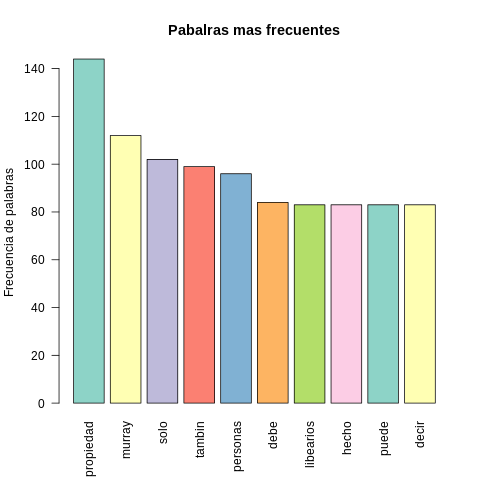

In [48]:
%%R

barplot(dataletras[1:10,]$freq, las = 2, names.arg = dataletras[1:10,]$word, 
        col = brewer.pal(n = 8, name = "Set3"), main ="Pabalras mas frecuentes",
        ylab = "Frecuencia de palabras") 

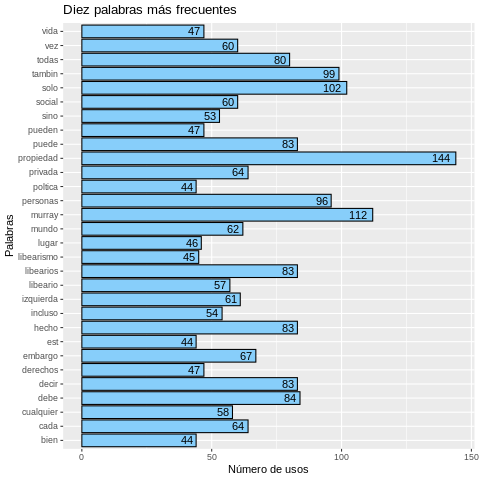

In [49]:
%%R

dataletras[1:30, ] %>%
   ggplot(aes(word, freq)) +
   geom_bar(stat = "identity", color = "black", fill = "#87CEFA") +
   geom_text(aes(hjust = 1.3, label = freq))+ 
   coord_flip() + 
   labs(title = "Diez palabras más frecuentes",  x = "Palabras", y = "Número de usos")

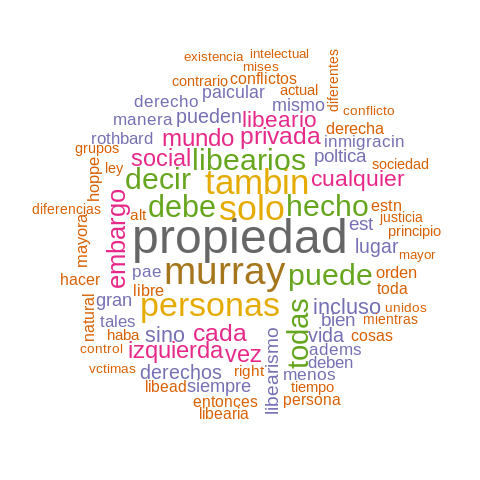

In [50]:
%%R

#nube de palabras sin frecuencias mínimas
wordcloud(
   words = dataletras$word, freq = dataletras$freq,
   max.words = 80, 
   random.order = F, 
   colors=brewer.pal(name = "Dark2", n = 8)
)

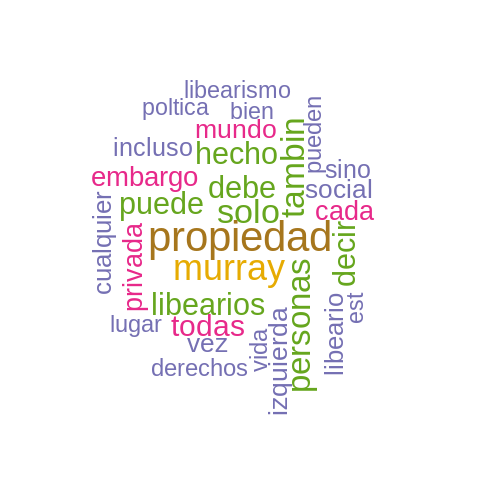

In [51]:
%%R

#nube de palabras con frecuencias mónimas
wordcloud(words = dataletras$word, freq = dataletras$freq, min.freq = 2,
          max.words=30, random.order=FALSE, rot.per=0.35,  
          colors=brewer.pal(7, "Dark2"), scale=c(3.5,1.25))

'''Veamos ahora cómo se asocian algunas palabras (terms) en Niebla con la 
función findAssocs. Como podemos introducir un vector, podemos obtener las 
asociaciones de varias palabras a la vez. He elegido 
"Petro", "petro","Uribe", "uribe"

Es importante recordar que con esto no estamos pidiendo la asociacion de estas
cuatro palabras entre si, sino las asociaciones para cada una de las cuatro, que
no necesariamente deben coincidir.

Esta también nos pide el límite inferior de correlación (corlimit)
para mostrarnos. Valores cercanos a 1 indican que las palabras aparecen casi
siempre asociadas una con otra, valores cercanos a 0 nos indican que nunca o
casi nunca lo hacen.

El valor que decidamos depende del tipo de documento y el tipo de asociaciones
que nos interesen. para nuestros fines, lo he fijado en .25.'''

In [56]:
%%R

# Eliminar términos dispersos
nov_new <- removeSparseTerms(letras, sparse = 0.99999999999999)

In [57]:
%%R
# Convertir en matriz y normalizar los valores
nov_new <- as.matrix(nov_new)
nov_new <- nov_new / rowSums(nov_new)

In [ ]:
%%R

# Calcular la distancia entre los términos
nov_dist <- dist(nov_new, method = "euclidean")

# Realizar el clustering jerárquico
nov_hclust <- hclust(nov_dist, method = "ward.D")

# Graficar el dendrograma
plot(nov_hclust, main = "Clustering de Palabras", sub = "", xlab = "")
